In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# Load the benchmark results
serial_df1 = pd.read_csv('serial_benchmark_results.csv')
openmp_df1 = pd.read_csv('openmp_benchmark_results.csv')
mpi_df1 = pd.read_csv('mpi_benchmark_results.csv')

In [10]:
serial_df1.tail()

,File,Encoder_Time_seconds,Decoder_Time_seconds,Compression_Ratio,Runs
3,10000.txt,0.0268,0.0088,0.166278,5
4,100000.txt,0.2676,0.0872,0.165357,5
5,1000000.txt,2.7296,0.8622,0.164986,5
6,10000000.txt,28.3762,8.7478,0.164933,5
7,shakespeare_ascii.txt,8.1764,2.4882,0.303988,5


## Analysis on Different Input Size 

In [11]:
def extract_numeric_filename(df):
    df = df.copy()
    df["Input_Size"] = df["File"].str.replace(".txt", "", regex=False)
    df = df[df["Input_Size"].str.isnumeric()]   # keep only numeric file names
    df["Input_Size"] = df["Input_Size"].astype(int)
    return df.sort_values("Input_Size")

In [12]:
serial_df = extract_numeric_filename(serial_df1)
openmp_df = extract_numeric_filename(openmp_df1)
mpi_df = extract_numeric_filename(mpi_df1)

### Serial Implementation Analysis

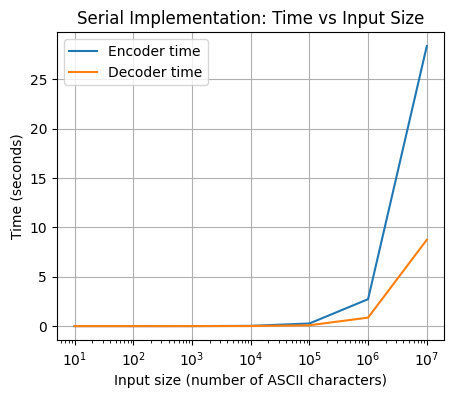

In [13]:
# biểu đồ time với input size khác nhau 
plt.figure(figsize=(5,4))
plt.plot(serial_df["Input_Size"], serial_df["Encoder_Time_seconds"], label="Encoder time")
plt.plot(serial_df["Input_Size"], serial_df["Decoder_Time_seconds"], label="Decoder time")

plt.title("Serial Implementation: Time vs Input Size")
plt.xlabel("Input size (number of ASCII characters)")
plt.ylabel("Time (seconds)")
plt.xscale("log")
plt.grid(True)
plt.legend()
plt.show()

### OpenMP Implementation Analysis

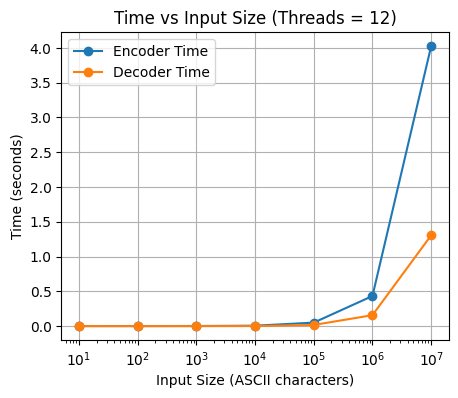

In [15]:
# biểu đò time và input size khác nhau với số lượng p = 12
plt.figure(figsize=(5,4))

df_12 = openmp_df[openmp_df["Processors"] == 12].sort_values("Input_Size")

plt.plot(df_12["Input_Size"], df_12["Encoder_Time_seconds"], marker="o", label="Encoder Time")
plt.plot(df_12["Input_Size"], df_12["Decoder_Time_seconds"], marker="o", label="Decoder Time")

plt.title("Time vs Input Size (Threads = 12)")
plt.xlabel("Input Size (ASCII characters)")
plt.ylabel("Time (seconds)")
plt.xscale("log")
plt.grid(True)
plt.legend()
plt.show()

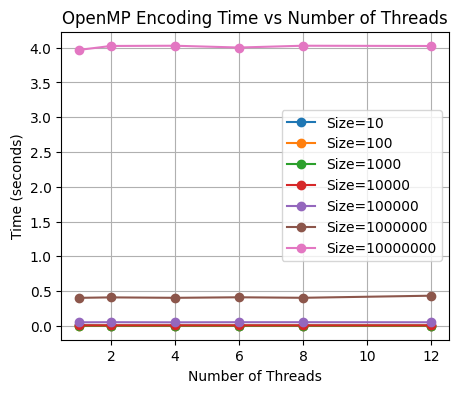

In [17]:
# openmp encoding time vs no.f processors for different input sizes
plt.figure(figsize=(5,4))

for size in sorted(openmp_df["Input_Size"].unique()):
    df_sub = openmp_df[openmp_df["Input_Size"] == size].sort_values("Processors")
    plt.plot(df_sub["Processors"], df_sub["Encoder_Time_seconds"], marker="o", label=f"Size={size}")

plt.title("OpenMP Encoding Time vs Number of Threads")
plt.xlabel("Number of Threads")
plt.ylabel("Time (seconds)")
plt.grid(True)
plt.legend()
plt.show()

### MPI Implementation Analysis

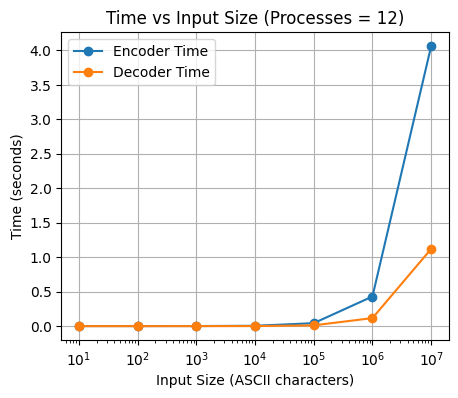

In [18]:
# biểu đò time và input size khác nhau với số lượng p = 12
plt.figure(figsize=(5,4))

df_12 = mpi_df[mpi_df["Processes"] == 12].sort_values("Input_Size")

plt.plot(df_12["Input_Size"], df_12["Encoder_Time_seconds"], marker="o", label="Encoder Time")
plt.plot(df_12["Input_Size"], df_12["Decoder_Time_seconds"], marker="o", label="Decoder Time")

plt.title("Time vs Input Size (Processes = 12)")
plt.xlabel("Input Size (ASCII characters)")
plt.ylabel("Time (seconds)")
plt.xscale("log")
plt.grid(True)
plt.legend()
plt.show()

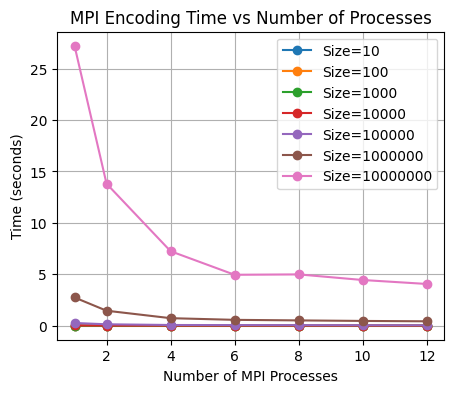

In [19]:
# mpi encoding time vs no.f processes for different input sizes
plt.figure(figsize=(5,4))

for size in sorted(mpi_df["Input_Size"].unique()):
    df_sub = mpi_df[mpi_df["Input_Size"] == size].sort_values("Processes")
    plt.plot(df_sub["Processes"], df_sub["Encoder_Time_seconds"], marker="o", label=f"Size={size}")

plt.title("MPI Encoding Time vs Number of Processes")
plt.xlabel("Number of MPI Processes")
plt.ylabel("Time (seconds)")
plt.grid(True)
plt.legend()
plt.show()

### Others

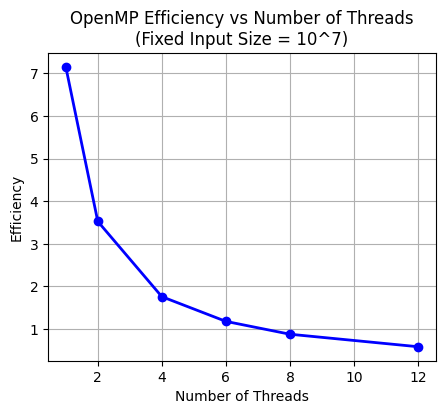

In [20]:
# efficiency vs processors for fixed problem size of 10^7 
plt.figure(figsize=(5,4))
size_fixed = 10_000_000
# Serial baseline
serial_time_fixed = serial_df[serial_df["Input_Size"] == size_fixed]["Encoder_Time_seconds"].values[0]
# Lọc toàn bộ p & T_parallel
df_fixed = openmp_df[openmp_df["Input_Size"] == size_fixed].sort_values("Processors")

p_list = df_fixed["Processors"].values
t_parallel = df_fixed["Encoder_Time_seconds"].values

eff_list = serial_time_fixed / (p_list * t_parallel)

plt.plot(p_list, eff_list, marker="o", color="blue", linewidth=2)

plt.title("OpenMP Efficiency vs Number of Threads\n(Fixed Input Size = 10^7)")
plt.xlabel("Number of Threads")
plt.ylabel("Efficiency")
plt.grid(True)
plt.show()

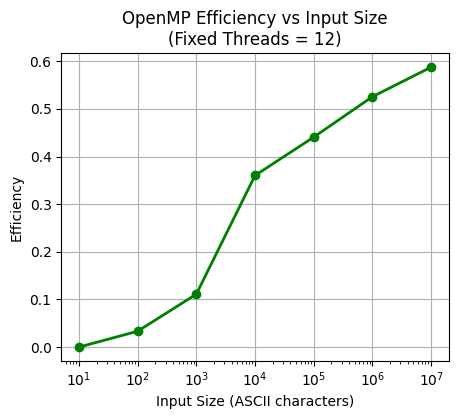

In [21]:
# efficiency vs problem-size for fixed number of processors p = 12
plt.figure(figsize=(5,4))
p_fixed = 12
df_fixed_p = openmp_df[openmp_df["Processors"] == p_fixed].sort_values("Input_Size")
serial_times = serial_df.set_index("Input_Size")["Encoder_Time_seconds"]
eff_list_size = serial_times[df_fixed_p["Input_Size"]].values / (p_fixed * df_fixed_p["Encoder_Time_seconds"].values)
plt.plot(df_fixed_p["Input_Size"], eff_list_size, marker="o", color="green", linewidth=2)
plt.title("OpenMP Efficiency vs Input Size\n(Fixed Threads = 12)")
plt.xlabel("Input Size (ASCII characters)")
plt.ylabel("Efficiency")
plt.grid(True)
plt.xscale("log")
plt.show()

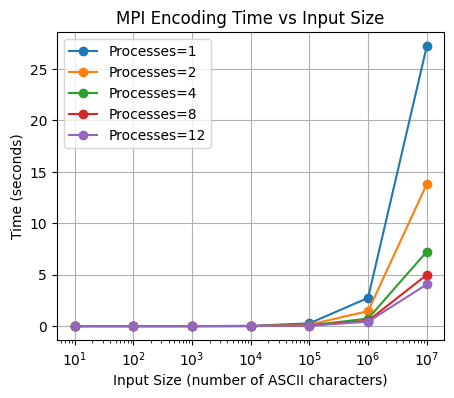

In [22]:
# encoding time for mpi with different number of processes (2 and 4 processes)
plt.figure(figsize=(5,4))
for p in [1, 2, 4, 8, 12]:
    df_sub = mpi_df[mpi_df["Processes"] == p].sort_values("Input_Size")
    plt.plot(df_sub["Input_Size"], df_sub["Encoder_Time_seconds"], marker="o", label=f"Processes={p}")
plt.title("MPI Encoding Time vs Input Size")
plt.xlabel("Input Size (number of ASCII characters)")
plt.ylabel("Time (seconds)")
plt.xscale("log")
plt.grid(True)
plt.legend()
plt.show()

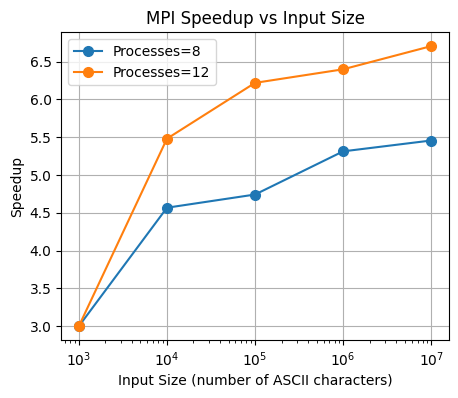

In [40]:
# speedup vs input size for mpi with different number of processes (2 and 4 processes)
plt.figure(figsize=(5,4))
baseline = mpi_df[(mpi_df["Processes"] == 1) & (mpi_df["Input_Size"] >= 1000)][["Input_Size","Encoder_Time_seconds"]]
baseline = baseline.rename(columns={"Encoder_Time_seconds":"T1"})
for p in [8, 12]:
    df_sub = mpi_df[(mpi_df["Processes"] == p) & (mpi_df["Input_Size"] >= 1000)][["Input_Size","Encoder_Time_seconds"]]
    df_sub = df_sub.rename(columns={"Encoder_Time_seconds":"Tp"})

    merged = baseline.merge(df_sub, on="Input_Size", how="inner").sort_values("Input_Size")
    merged["Speedup"] = merged["T1"] / merged["Tp"]

    plt.plot(
        merged["Input_Size"], merged["Speedup"],
        marker="o",
        markersize=7,
        label=f"Processes={p}"
    )

plt.title("MPI Speedup vs Input Size")
plt.xlabel("Input Size (number of ASCII characters)")
plt.ylabel("Speedup")
plt.xscale("log")
plt.grid(True)
plt.legend()
plt.show()


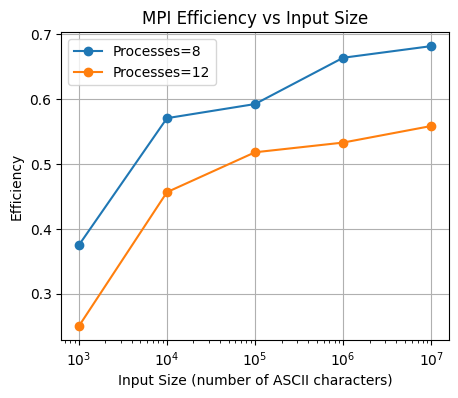

In [41]:
# efficiency vs input size for mpi with 8 and 12 processes
plt.figure(figsize=(5,4))

for p in [8, 12]:
    df_sub = mpi_df[mpi_df["Processes"] == p].sort_values("Input_Size")
    df_sub = df_sub[df_sub["Input_Size"] >= 1000]
    serial_times = mpi_df[mpi_df["Processes"] == 1].set_index("Input_Size")["Encoder_Time_seconds"]
    efficiency = serial_times[df_sub["Input_Size"]].values / (p * df_sub["Encoder_Time_seconds"].values)
    plt.plot(df_sub["Input_Size"], efficiency, marker="o", label=f"Processes={p}")

plt.title("MPI Efficiency vs Input Size")
plt.xlabel("Input Size (number of ASCII characters)")
plt.ylabel("Efficiency")
plt.xscale("log")
plt.grid(True)
plt.legend()
plt.show()

## Analysis on Shakespeare dataset (ASCII characters)

### OpenMP Implementation Analysis

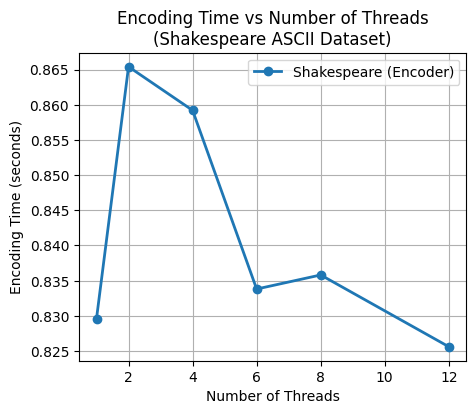

In [42]:
# time for encoding with different number of processors 
df_sh = openmp_df1[openmp_df1["File"] == "shakespeare_ascii.txt"].sort_values("Processors")

plt.figure(figsize=(5,4))

plt.plot(df_sh["Processors"],
         df_sh["Encoder_Time_seconds"],
         marker="o",
         linewidth=2,
         label="Shakespeare (Encoder)")

plt.title("Encoding Time vs Number of Threads\n(Shakespeare ASCII Dataset)")
plt.xlabel("Number of Threads")
plt.ylabel("Encoding Time (seconds)")
plt.grid(True)
plt.legend()
plt.show()

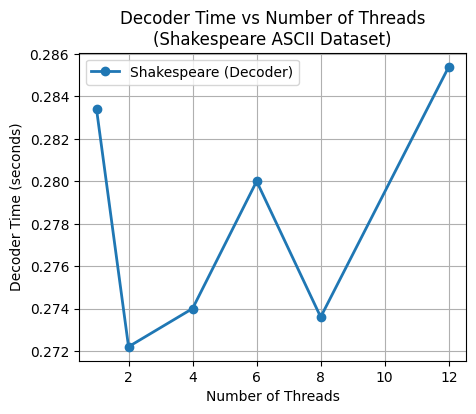

In [43]:
plt.figure(figsize=(5,4))

plt.plot(df_sh["Processors"],
         df_sh["Decoder_Time_seconds"],
         marker="o",
         linewidth=2,
         label="Shakespeare (Decoder)")

plt.title("Decoder Time vs Number of Threads\n(Shakespeare ASCII Dataset)")
plt.xlabel("Number of Threads")
plt.ylabel("Decoder Time (seconds)")
plt.grid(True)
plt.legend()
plt.show()

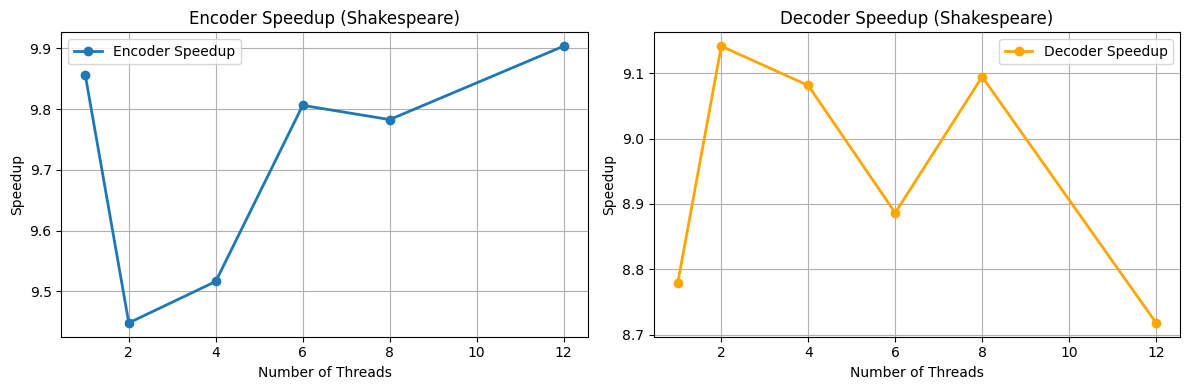

In [45]:
# speedup vs number of processors
df_sh_serial = serial_df1[serial_df1["File"] == "shakespeare_ascii.txt"]
T_serial_enc = df_sh_serial["Encoder_Time_seconds"].values[0]
T_serial_dec = df_sh_serial["Decoder_Time_seconds"].values[0]
df_sh_omp = openmp_df1[openmp_df1["File"] == "shakespeare_ascii.txt"].sort_values("Processors")
speedup_enc = T_serial_enc / df_sh_omp["Encoder_Time_seconds"]
speedup_dec = T_serial_dec / df_sh_omp["Decoder_Time_seconds"]
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Encoder Speedup
axes[0].plot(df_sh_omp["Processors"], speedup_enc, marker="o", linewidth=2, label="Encoder Speedup")
axes[0].set_title("Encoder Speedup (Shakespeare)")
axes[0].set_xlabel("Number of Threads")
axes[0].set_ylabel("Speedup")
axes[0].grid(True)
axes[0].legend()

# Decoder Speedup
axes[1].plot(df_sh_omp["Processors"], speedup_dec, marker="o", linewidth=2, color="orange", label="Decoder Speedup")
axes[1].set_title("Decoder Speedup (Shakespeare)")
axes[1].set_xlabel("Number of Threads")
axes[1].set_ylabel("Speedup")
axes[1].grid(True)
axes[1].legend()
plt.tight_layout()
plt.show()

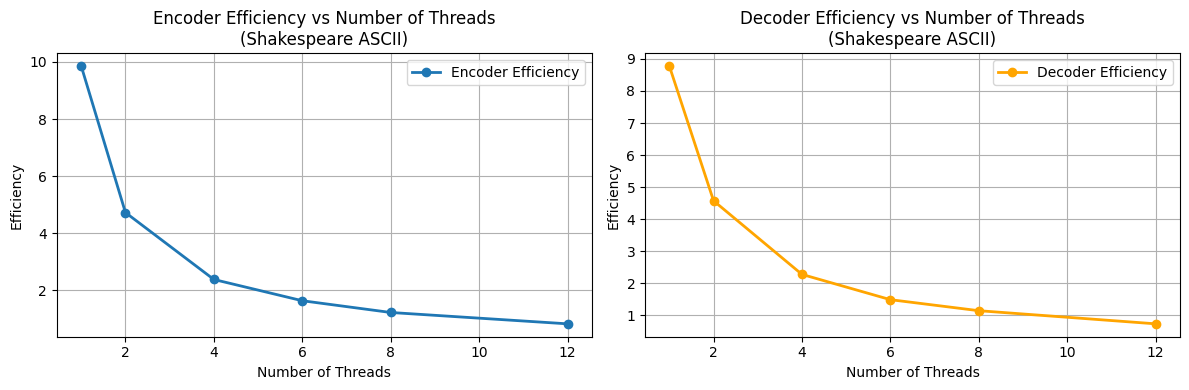

In [47]:
eff_enc = speedup_enc / df_sh_omp["Processors"]
eff_dec = speedup_dec / df_sh_omp["Processors"]
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Encoder Efficiency
axes[0].plot(df_sh_omp["Processors"], eff_enc, marker="o", linewidth=2, label="Encoder Efficiency")
axes[0].set_title("Encoder Efficiency vs Number of Threads\n(Shakespeare ASCII)")
axes[0].set_xlabel("Number of Threads")
axes[0].set_ylabel("Efficiency")
axes[0].grid(True)
axes[0].legend()

# Decoder Efficiency
axes[1].plot(df_sh_omp["Processors"], eff_dec, marker="o", linewidth=2, color="orange", label="Decoder Efficiency")
axes[1].set_title("Decoder Efficiency vs Number of Threads\n(Shakespeare ASCII)")
axes[1].set_xlabel("Number of Threads")
axes[1].set_ylabel("Efficiency")
axes[1].grid(True)
axes[1].legend()
plt.tight_layout()
plt.show()

### MPI Implementation Analysis

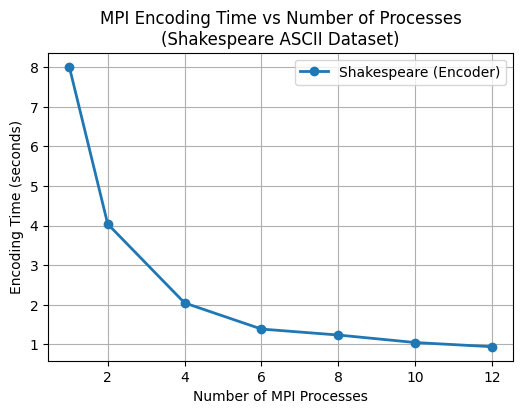

In [48]:
df_sh = mpi_df1[mpi_df1["File"] == "shakespeare_ascii.txt"].copy()
df_sh = df_sh.sort_values("Processes")

plt.figure(figsize=(6,4))
plt.plot(df_sh["Processes"],
         df_sh["Encoder_Time_seconds"],
         marker="o",
         linewidth=2,
         label="Shakespeare (Encoder)")

plt.title("MPI Encoding Time vs Number of Processes\n(Shakespeare ASCII Dataset)")
plt.xlabel("Number of MPI Processes")
plt.ylabel("Encoding Time (seconds)")
plt.grid(True)
plt.legend()
plt.show()

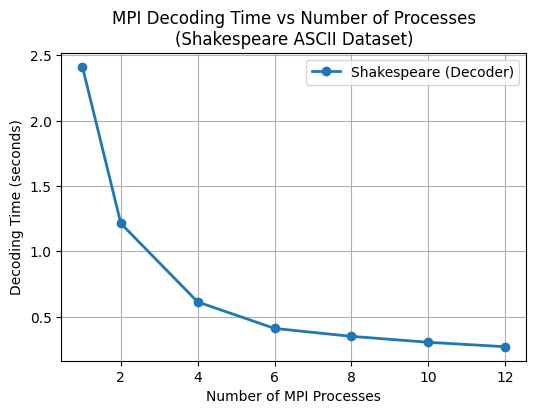

In [49]:
plt.figure(figsize=(6,4))
plt.plot(df_sh["Processes"],
         df_sh["Decoder_Time_seconds"],
         marker="o",
         linewidth=2,
         label="Shakespeare (Decoder)")

plt.title("MPI Decoding Time vs Number of Processes\n(Shakespeare ASCII Dataset)")
plt.xlabel("Number of MPI Processes")
plt.ylabel("Decoding Time (seconds)")
plt.grid(True)
plt.legend()
plt.show()

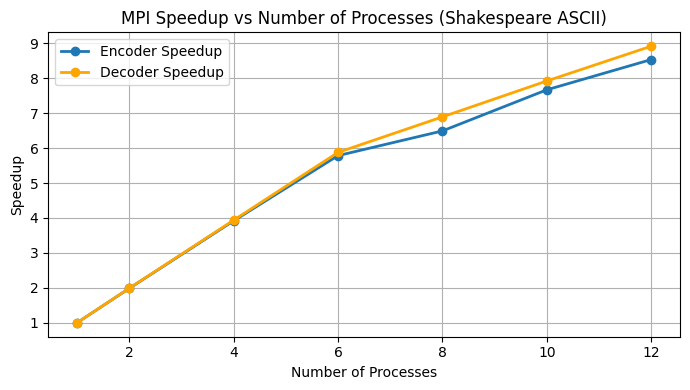

In [50]:
T1_enc = df_sh[df_sh["Processes"] == 1]["Encoder_Time_seconds"].values[0]
T1_dec = df_sh[df_sh["Processes"] == 1]["Decoder_Time_seconds"].values[0]
df_sh["Speedup_Encoder"] = T1_enc / df_sh["Encoder_Time_seconds"]
df_sh["Speedup_Decoder"] = T1_dec / df_sh["Decoder_Time_seconds"]

plt.figure(figsize=(7,4))
plt.plot(df_sh["Processes"], df_sh["Speedup_Encoder"], marker="o", linewidth=2, label="Encoder Speedup")
plt.plot(df_sh["Processes"], df_sh["Speedup_Decoder"], marker="o", linewidth=2, color="orange", label="Decoder Speedup")
plt.title("MPI Speedup vs Number of Processes (Shakespeare ASCII)")
plt.xlabel("Number of Processes")
plt.ylabel("Speedup")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

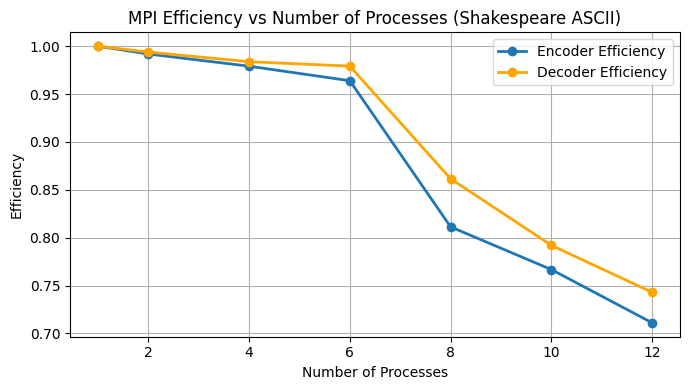

In [51]:
# Tính efficiency
df_sh["Eff_Encoder"] = df_sh["Speedup_Encoder"] / df_sh["Processes"]
df_sh["Eff_Decoder"] = df_sh["Speedup_Decoder"] / df_sh["Processes"]
plt.figure(figsize=(7,4))
plt.plot(df_sh["Processes"], df_sh["Eff_Encoder"], 
         marker="o", linewidth=2, label="Encoder Efficiency")

plt.plot(df_sh["Processes"], df_sh["Eff_Decoder"], 
         marker="o", linewidth=2, color="orange", label="Decoder Efficiency")

plt.title("MPI Efficiency vs Number of Processes (Shakespeare ASCII)")
plt.xlabel("Number of Processes")
plt.ylabel("Efficiency")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

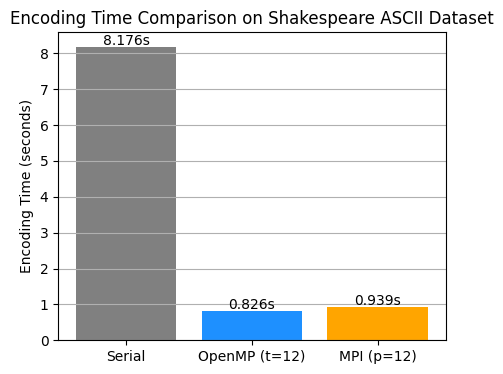

In [55]:
# compare 3 implementation
df_sh_serial  = serial_df1[serial_df1["File"] == "shakespeare_ascii.txt"].copy()
df_sh_openmp  = openmp_df1[openmp_df1["File"] == "shakespeare_ascii.txt"].copy()
df_sh_mpi     = mpi_df1[mpi_df1["File"] == "shakespeare_ascii.txt"].copy()
best_openmp_time = df_sh_openmp["Encoder_Time_seconds"].min()
best_openmp_p     = df_sh_openmp.loc[df_sh_openmp["Encoder_Time_seconds"].idxmin(), "Processors"]
best_mpi_time = df_sh_mpi["Encoder_Time_seconds"].min()
best_mpi_p     = df_sh_mpi.loc[df_sh_mpi["Encoder_Time_seconds"].idxmin(), "Processes"]
serial_time = df_sh_serial["Encoder_Time_seconds"].iloc[0]
compare_df = pd.DataFrame({
    "Implementation": ["Serial", f"OpenMP (t={best_openmp_p})", f"MPI (p={best_mpi_p})"],
    "Encode_Time":    [serial_time, best_openmp_time, best_mpi_time],
})
plt.figure(figsize=(5,4))
plt.bar(compare_df["Implementation"], compare_df["Encode_Time"],
        color=["gray", "dodgerblue", "orange"])

plt.title("Encoding Time Comparison on Shakespeare ASCII Dataset")
plt.ylabel("Encoding Time (seconds)")
plt.grid(axis='y')

for idx, row in compare_df.iterrows():
    plt.text(idx, row["Encode_Time"] + 0.05, f"{row['Encode_Time']:.3f}s",
             ha='center', fontsize=10)

plt.show()

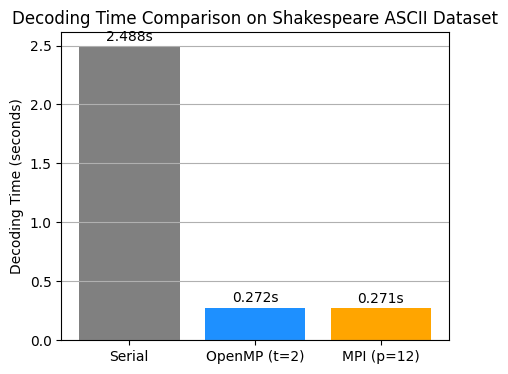

In [54]:
# compare 3 implementation
best_openmp_time = df_sh_openmp["Decoder_Time_seconds"].min()
best_openmp_p     = df_sh_openmp.loc[df_sh_openmp["Decoder_Time_seconds"].idxmin(), "Processors"]
best_mpi_time = df_sh_mpi["Decoder_Time_seconds"].min()
best_mpi_p     = df_sh_mpi.loc[df_sh_mpi["Decoder_Time_seconds"].idxmin(), "Processes"]
serial_time = df_sh_serial["Decoder_Time_seconds"].iloc[0]
compare_df = pd.DataFrame({
    "Implementation": ["Serial", f"OpenMP (t={best_openmp_p})", f"MPI (p={best_mpi_p})"],
    "Decode_Time":    [serial_time, best_openmp_time, best_mpi_time],
})
plt.figure(figsize=(5,4))
plt.bar(compare_df["Implementation"], compare_df["Decode_Time"],
        color=["gray", "dodgerblue", "orange"])

plt.title("Decoding Time Comparison on Shakespeare ASCII Dataset")
plt.ylabel("Decoding Time (seconds)")
plt.grid(axis='y')

for idx, row in compare_df.iterrows():
    plt.text(idx, row["Decode_Time"] + 0.05, f"{row['Decode_Time']:.3f}s",
             ha='center', fontsize=10)

plt.show()